In [46]:
using RDatasets
using CSV, DataFrames
using MLLabelUtils
using Plots
using Evolutive
using Random
using StatsPlots

In [47]:
begin
    # Cargar el archivo Wine CSV
    wine = CSV.read("wine.csv", DataFrame, header=false)

    # Agregar nombres de columnas manualmente
    rename!(wine, ["Class", "Alcohol", "MalicAcid", "Ash", "Alcalinity", "Magnesium", "TotalPhenols", 
                "Flavanoids", "NonflavanoidPhenols", "Proanthocyanins", "ColorIntensity", 
                "Hue", "OD280_OD315", "Proline"])

    clusters_reales = wine[:,1]

    wine_data = Matrix(wine[:, Not(:Class)])
end

178×13 Matrix{Float64}:
 14.23  1.71  2.43  15.6  127.0  2.8   …  2.29   5.64  1.04  3.92  1065.0
 13.2   1.78  2.14  11.2  100.0  2.65     1.28   4.38  1.05  3.4   1050.0
 13.16  2.36  2.67  18.6  101.0  2.8      2.81   5.68  1.03  3.17  1185.0
 14.37  1.95  2.5   16.8  113.0  3.85     2.18   7.8   0.86  3.45  1480.0
 13.24  2.59  2.87  21.0  118.0  2.8      1.82   4.32  1.04  2.93   735.0
 14.2   1.76  2.45  15.2  112.0  3.27  …  1.97   6.75  1.05  2.85  1450.0
 14.39  1.87  2.45  14.6   96.0  2.5      1.98   5.25  1.02  3.58  1290.0
 14.06  2.15  2.61  17.6  121.0  2.6      1.25   5.05  1.06  3.58  1295.0
 14.83  1.64  2.17  14.0   97.0  2.8      1.98   5.2   1.08  2.85  1045.0
 13.86  1.35  2.27  16.0   98.0  2.98     1.85   7.22  1.01  3.55  1045.0
  ⋮                              ⋮     ⋱               ⋮           
 13.4   4.6   2.86  25.0  112.0  1.98     1.11   8.5   0.67  1.92   630.0
 12.2   3.03  2.32  19.0   96.0  1.25  …  0.73   5.5   0.66  1.83   510.0
 12.77  2.39  2.28  

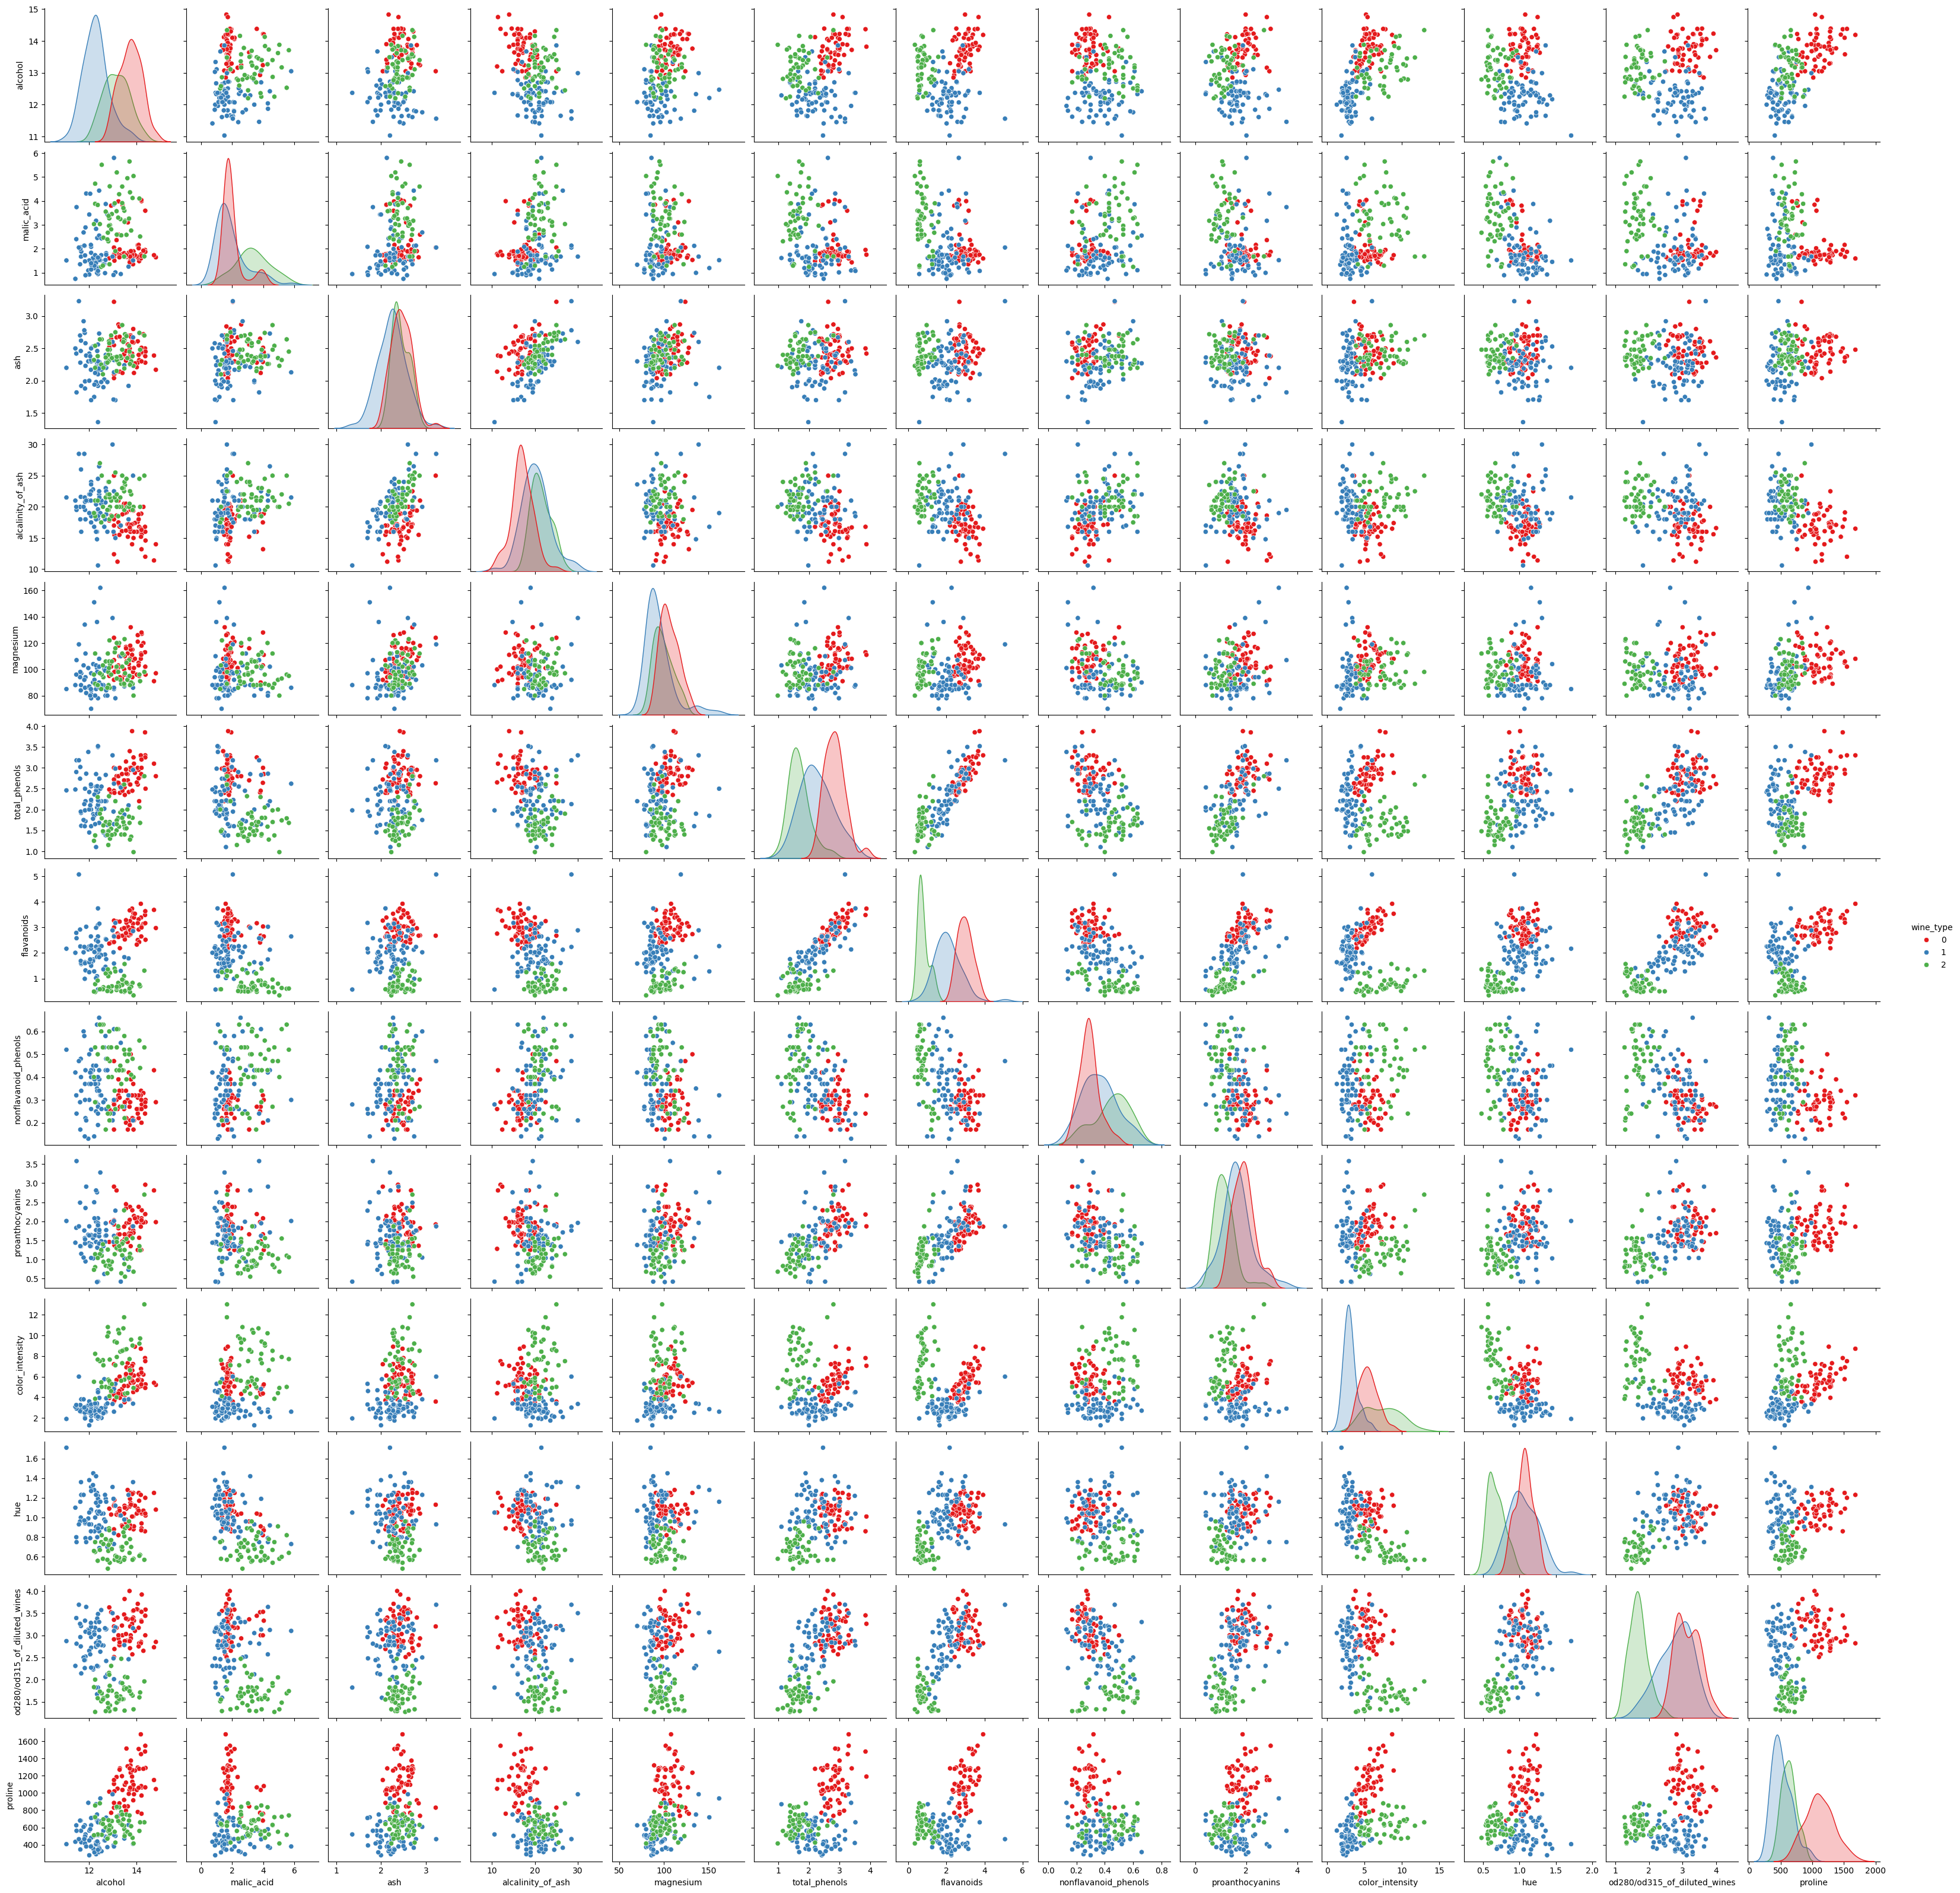

Diagrama de dispercion del dataset, lo realice en python porque no encontre como hacerlo en julia. 

Vamos a visualizar en los graficos proline-OD280_OD315, ya que considere que es la realcion que mejor se distinguen los clusters.

In [73]:
K = 3
popsize = 20
max_gen = 200
p = 0.15
clusters_gka = GeneticKMeans(wine_data, K, popsize, max_gen, p)

200-element Vector{Vector{Int64}}:
 [2, 2, 2, 2, 3, 2, 2, 2, 2, 2  …  3, 1, 1, 1, 1, 3, 3, 2, 2, 1]
 [2, 2, 2, 2, 1, 2, 2, 2, 2, 2  …  1, 1, 3, 3, 1, 1, 1, 1, 1, 3]
 [3, 3, 3, 3, 2, 3, 3, 3, 3, 3  …  2, 2, 1, 1, 2, 2, 2, 2, 2, 1]
 [1, 1, 1, 1, 2, 1, 1, 1, 1, 1  …  2, 2, 3, 3, 2, 2, 2, 2, 2, 3]
 [2, 2, 2, 2, 1, 2, 2, 2, 2, 2  …  1, 1, 3, 3, 1, 1, 1, 1, 1, 3]
 [3, 3, 3, 3, 2, 3, 3, 3, 3, 3  …  2, 2, 1, 1, 2, 2, 2, 2, 2, 1]
 [3, 3, 3, 3, 2, 3, 3, 3, 3, 3  …  2, 2, 1, 1, 2, 2, 2, 2, 2, 1]
 [1, 1, 1, 1, 2, 1, 1, 1, 1, 1  …  2, 2, 3, 3, 2, 2, 2, 2, 2, 3]
 [1, 1, 1, 1, 2, 1, 1, 1, 1, 1  …  2, 2, 3, 3, 2, 2, 2, 2, 2, 3]
 [1, 1, 1, 1, 2, 1, 1, 1, 1, 1  …  2, 2, 3, 3, 2, 2, 2, 2, 2, 3]
 ⋮
 [2, 2, 2, 2, 3, 2, 2, 2, 2, 2  …  3, 3, 1, 1, 3, 3, 3, 3, 3, 1]
 [2, 2, 2, 2, 3, 2, 2, 2, 2, 2  …  3, 3, 1, 1, 3, 3, 3, 3, 3, 1]
 [2, 2, 2, 2, 3, 2, 2, 2, 2, 2  …  3, 3, 1, 1, 3, 3, 3, 3, 3, 1]
 [2, 2, 2, 2, 3, 2, 2, 2, 2, 2  …  3, 3, 1, 1, 3, 3, 3, 3, 3, 1]
 [2, 2, 2, 2, 3, 2, 2, 2, 2, 2  …  3, 3, 1, 1, 3, 3,

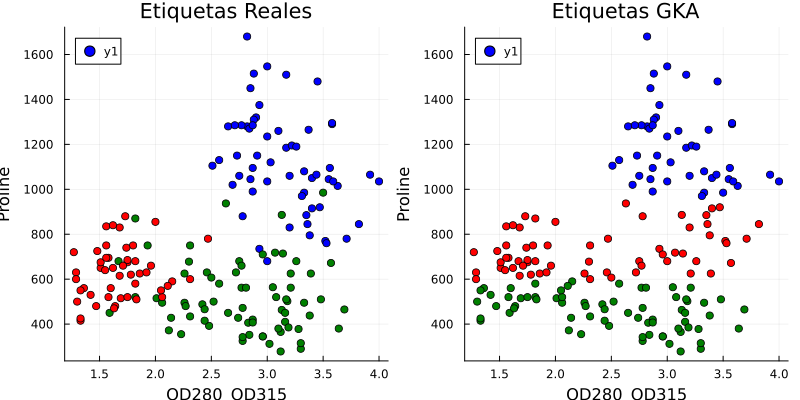

In [81]:
begin
    # Definir colores para cada etiqueta
    colores_1 = Dict(1 => "blue", 2 => "green", 3 => "red")

    # Definir colores para cada etiqueta
    colores_2 = Dict(2 => "blue", 1 => "green", 3 => "red")

    # Crear una lista de colores basada en las etiquetas reales
    colores_reales = [colores_1[e] for e in clusters_reales]

    # Crear una lista de colores basada en los clústeres asignados
    colores_gka = [colores_2[c] for c in clusters_gka[end]]

    p1 = scatter(wine[:, 13], wine[:, 14], color=colores_reales, legend=:topleft, 
        title="Etiquetas Reales", xlabel="OD280_OD315", ylabel="Proline", 
        marker=:circle, size=(800, 400))

    # Graficar con las etiquetas asignadas por K-means
    p2 = scatter(wine[:, 13], wine[:, 14], color=colores_gka, legend=:topleft, 
        title="Etiquetas GKA", xlabel="OD280_OD315", ylabel="Proline",
        marker=:circle, size=(800, 400))

    # Mostrar ambos gráficos uno al lado del otro
    plot(p1, p2, layout=(1, 2))
end

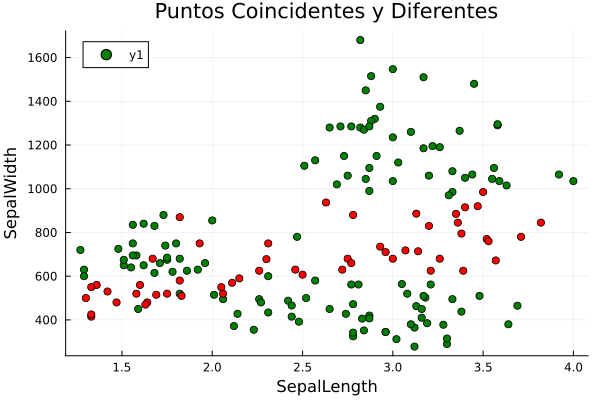

In [82]:
begin
    # Identificar puntos donde coinciden y donde difieren
    coinciden = colores_reales .== colores_gka

    # Definir colores para los puntos coincidentes y diferentes
    colores_coinciden = "green"
    colores_difieren = "red"

    # Crear una lista de colores basada en la coincidencia de etiquetas
    colores = [coinciden[i] ? colores_coinciden : colores_difieren for i in 1:length(coinciden)]

    # Graficar
    scatter(wine[:, 13], wine[:, 14], color=colores, legend=:topleft, 
        title="Puntos Coincidentes y Diferentes", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle)
end

In [83]:
accuracy = sum(coinciden) / length(coinciden)

0.702247191011236

In [86]:
Random.seed!(340)

result = kmeans(wine_data', K)

# Asignaciones de clúster para cada punto
clusters_K = result.assignments

178-element Vector{Int64}:
 2
 2
 3
 3
 2
 3
 3
 3
 2
 2
 ⋮
 1
 1
 1
 1
 2
 2
 2
 2
 1

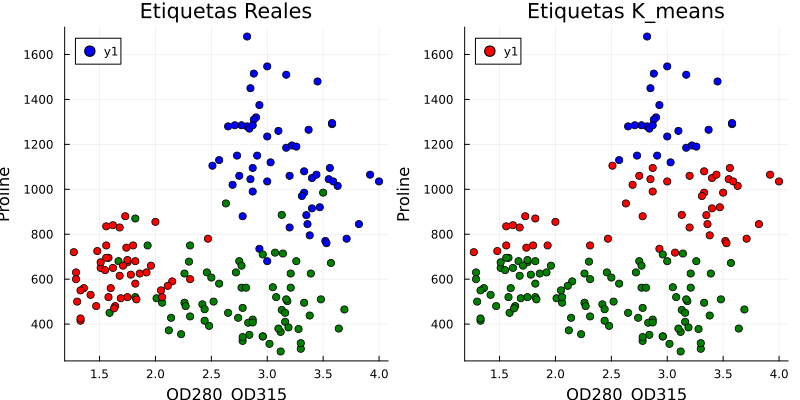

In [87]:
begin

    # Definir colores para cada etiqueta
    colores_1 = Dict(1 => "blue", 2 => "green", 3 => "red")

    # Definir colores para cada etiqueta
    colores_2 = Dict(3 => "blue", 1 => "green", 2 => "red")

    # Crear una lista de colores basada en las etiquetas reales
    colores_reales = [colores_1[e] for e in clusters_reales]

    # Crear una lista de colores basada en los clústeres asignados
    colores_K = [colores_2[c] for c in clusters_K]

    p1 = scatter(wine[:, 13], wine[:, 14], color=colores_reales, legend=:topleft, 
        title="Etiquetas Reales", xlabel="OD280_OD315", ylabel="Proline", 
        marker=:circle, size=(800, 400))

    # Graficar con las etiquetas asignadas por K-means
    p2 = scatter(wine[:, 13], wine[:, 14], color=colores_K, legend=:topleft, 
        title="Etiquetas K_means", xlabel="OD280_OD315", ylabel="Proline",
        marker=:circle, size=(800, 400))

    # Mostrar ambos gráficos uno al lado del otro
    plot(p1, p2, layout=(1, 2))
end

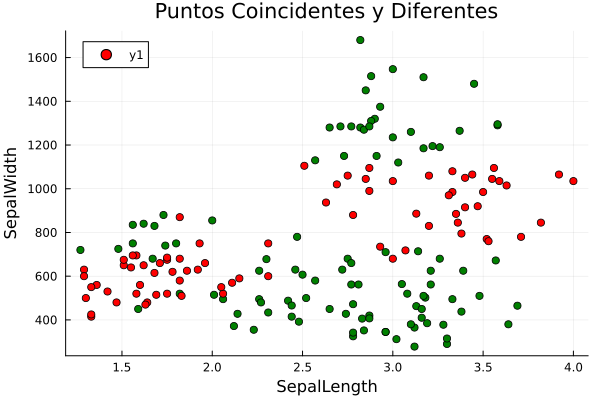

In [88]:
begin
    # Identificar puntos donde coinciden y donde difieren
    coinciden = colores_reales .== colores_K

    # Definir colores para los puntos coincidentes y diferentes
    colores_coinciden = "green"
    colores_difieren = "red"

    # Crear una lista de colores basada en la coincidencia de etiquetas
    colores = [coinciden[i] ? colores_coinciden : colores_difieren for i in 1:length(coinciden)]

    # Graficar
    scatter(wine[:, 13], wine[:, 14], color=colores, legend=:topleft, 
        title="Puntos Coincidentes y Diferentes", xlabel="SepalLength", ylabel="SepalWidth", 
        marker=:circle)
end

In [89]:
accuracy = sum(coinciden) / length(coinciden)

0.5730337078651685

Notar que aca tambien resulta mejor el GKA